In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess, arma_acf, arma_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_process import arma2ma

# Q1
**a)**  
The mean of $x_t$ is  
$$
\mathbb{E}[x_t]
\;=\;\mathbb{E}\bigl[(a + b t)\,\alpha_t + y_t\bigr]
\;=\;(a + b t)\,\alpha_t + \mathbb{E}[y_t].
$$  
Since $\alpha_t$ is periodic but $a+bt$ grows (or declines) linearly in $t$, the term $(a+bt)\,\alpha_t$ makes the mean depend on $t$.  A necessary condition for stationarity is a constant mean; here $\mathbb{E}[x_t]$ is not constant in $t$.  Hence $\{x_t\}$ is **not** (weakly) stationary.

---

**b)**  
Define the seasonal second‐difference operator at lag $s$ by
$$
\nabla_s^2 \;=\;(1 - B^s)^2 \;=\; 1 \;-\;2B^s\;+\;B^{2s},
$$  
where $B$ is the backshift ($B x_t = x_{t-1}$).  Then
$$
u_t \;=\;\nabla_s^2\,x_t
\;=\;(1-2B^s + B^{2s})\bigl[(a+bt)\,\alpha_t + y_t\bigr].
$$  
Observe that because $\alpha_{t}=\alpha_{t-s}$,  
$$
(1-B^s)\bigl[(a+bt)\,\alpha_t\bigr]
\;=\;
(a+bt)\,\alpha_t \;-\;(a+b(t-s))\,\alpha_{t}
\;=\;b\,s\,\alpha_t,
$$  
so a second application of $(1-B^s)$ gives  
$$
(1-B^s)\bigl[b\,s\,\alpha_t\bigr]
\;=\;b\,s\,\alpha_t \;-\;b\,s\,\alpha_{t-s}
\;=\;0.
$$  
Thus
$$
\nabla_s^2\bigl[(a+bt)\,\alpha_t\bigr]=0,
$$  
and hence  
$$
u_t
\;=\;\nabla_s^2 y_t.
$$  
Since $\{y_t\}$ is (weakly) stationary and $\nabla_s^2$ is a linear filter with fixed coefficients, $\{u_t\}$ is also (weakly) stationary.

---

**c)**  
Write the filter coefficients $c_0=1$, $c_1=-2$, $c_2=1$, so
$$
u_t \;=\;\sum_{j=0}^2 c_j\,y_{t-j\,s}.
$$
Then for any lag $h$,
$$
\begin{aligned}
\gamma_u(h)
&=\;\mathrm{Cov}(u_t,\;u_{t+h})\\
&=\;\sum_{j=0}^2\sum_{k=0}^2
c_j\,c_k\;\mathrm{Cov}\bigl(y_{t-j\,s},\,y_{t+h-k\,s}\bigr)\\
&=\;\sum_{j=0}^2\sum_{k=0}^2
c_j\,c_k\;\gamma_y\bigl(h + (j-k)\,s\bigr).
\end{aligned}
$$  
Equivalently, expanding the sum gives
$$
\gamma_u(h)
=\;\gamma_y(h+2s)\;-\;2\,\gamma_y(h+s)\;+\;6\,\gamma_y(h)
\;-\;4\,\gamma_y(h-s)\;+\;\gamma_y(h-2s).
$$


# Q2

**a)**
Define:
$$\phi(z) = 1 - \frac{3}{4}z + \frac{1}{8}z^2 $$
we have $\phi(B)y_t = \epsilon_t$, where B is the backshift operator. Solving $\phi(z) = 0$ can get two roots: $z_1 = 2$ and $z_2 = 4$. Since both roots are greater than 1, so this AR(2) equation satisfy a unique causal stationary solution.

---

**b)**
$z_1 = 2$, $z_2 = 4$, hence we have:

We express $ y_t $ as an infinite-order moving average using the inverse of the AR operator:

$$
\begin{aligned}
y_t &= \frac{1}{\phi(B)} \varepsilon_t = \frac{1}{(1 - \frac{B}{2})(1 - \frac{B}{4})} \varepsilon_t \\
&= \left[ \sum_{j=0}^\infty \left( \frac{B}{2} \right)^j \right] \left[ \sum_{k=0}^\infty \left( \frac{B}{4} \right)^k \right] \varepsilon_t \\
&= \sum_{j=0}^\infty \sum_{k=0}^\infty \left( \frac{1}{2^j 4^k} \right) B^{j+k} \varepsilon_t
\end{aligned}
$$

Changing index to $ l = j + k $, we write:

$$
\begin{aligned}
y_t &= \sum_{l=0}^\infty \left[ \sum_{k=0}^l \left( \frac{1}{2} \right)^{l - k} \left( \frac{1}{4} \right)^k \right] \varepsilon_{t-l}
= \sum_{l=0}^\infty \left( \frac{1}{2} \right)^l \left[ \sum_{k=0}^l \left( \frac{1}{2} \right)^k \right] \varepsilon_{t-l} \\
&= \sum_{l=0}^\infty 2 \left( \frac{1}{2} \right)^l \left( 1 - \left( \frac{1}{2} \right)^{l+1} \right) \varepsilon_{t-l} \\
&= \sum_{l=0}^\infty \left( \left( \frac{1}{2} \right)^{l-1} - \left( \frac{1}{2} \right)^{2l} \right) \varepsilon_{t-l}
\end{aligned}
$$

So the **explicit causal solution** is:

$$
\boxed{
\sum_{l=0}^\infty \left( \left( \frac{1}{2} \right)^{l-1} - \left( \frac{1}{2} \right)^{2l} \right) \varepsilon_{t-l}
}
$$

---

**c)**
Denote:
- $ \gamma(h) = \mathrm{Cov}(y_t, y_{t+h}) $
- $ \rho(h) = \dfrac{\gamma(h)}{\gamma(0)} $

We start from the moving average representation of $ y_t $:
$$
y_t = \sum_{l=0}^\infty \psi_l \varepsilon_{t-l}, \quad \text{where } \psi_l = \left( \left( \frac{1}{2} \right)^{l-1} - \left( \frac{1}{2} \right)^{2l} \right)
$$

Then:
$$
\gamma(h) = \mathrm{Cov}(y_t, y_{t+h}) = \mathrm{Cov}\left( \sum_{l=0}^\infty \psi_l \varepsilon_{t-l}, \sum_{m=0}^\infty \psi_m \varepsilon_{t+h-m} \right)
$$

Because $ \varepsilon_t $ are i.i.d. with zero mean and variance $ \sigma^2 $, the only non-zero covariance terms satisfy:
$$
t - l = t + h - m \Rightarrow m = l + h
$$

So we get:
$$
\gamma(h) = \sigma^2 \sum_{l=0}^\infty \psi_l \psi_{l + h}
\quad \text{for } h \geq 0
$$

By stationarity, $ \gamma(-h) = \gamma(h) $, so:
$$
\boxed{
\gamma(h) = \sigma^2 \sum_{l=0}^\infty \psi_l \psi_{l + |h|}, \quad \rho(h) = \frac{\gamma(h)}{\gamma(0)}
}
$$

# Q3
**a)**
For:
$$y_t = c\phi_1^{t} + \sum_{j=0}^{\infty}\phi_1^{j}\epsilon_{t-j}$$
$$y_{t-1} = c\phi_1^{t-1} + \sum_{j=0}^{\infty}\phi_1^{j}\epsilon_{t-1-j}$$

Multiply $y_{t-1}$ by $\phi_1$:
$$\phi_1 y_{t-1} = c\phi_1^{t} + \sum_{j=0}^{\infty}\phi_1^{j + 1}\epsilon_{t-1-j}$$

And notice that:
$$
\begin{aligned}
\phi_1 y_{t-1} + \epsilon_t
&= c\phi_1^{t} + \sum_{j=0}^{\infty}\phi_1^{j + 1}\epsilon_{t-1-j} + \epsilon_t \\
&=  c\phi_1^{t} + \epsilon_t + \phi_1\epsilon_{t-1} + \phi_1^2\epsilon_{t-2} + \dots \\
&= y_t
\end{aligned}
$$

Hence: 
$$y_t - \phi_1 y_{t-1} = \epsilon_t$$

And $y_t = c\phi_1^t + \sum_{j=0}^{\infty} \phi_1^{j}\epsilon_{t-j}$ is a solution to the difference equation.

---

**b)**
for $c \neq 0$,
since 
$$
\begin{aligned}
\mathbb{E}[y_t] 
&= \mathbb{E}[c\phi_1^{t} + \sum_{j=0}^{\infty}\phi_1^{j}\epsilon_{t-j}]\\
&= c\phi_1^{t} + 0\\
&= c\phi_1^{t}
\end{aligned}
$$

And $c\phi_1^{t}$ depends on t, which will change from one observation to another.
So $y_t$ is non-stationary for $c \neq 0$

# Q4
**a)**
Since $y_t$ is stationary, it is closed under linear filters and differencing.

Now, recall that differencing is a linear operator:

$$
(I - B)^k y_t = \sum_{j=0}^k (-1)^j \binom{k}{j} y_{t-j}
$$

This is a linear combination of stationary variables $ y_t, y_{t-1}, \dots, y_{t-k} $. Hence, the result is still stationary.


---

**b)**

We can write:

$$
x_t = p(t) + y_t, \quad \text{where } p(t) = \beta_0 + \beta_1 t + \cdots + \beta_q t^q
$$

Now apply $ (I - B)^k $ to both sides:

$$
(I - B)^k x_t = (I - B)^k p(t) + (I - B)^k y_t
$$

From **(a)**: $ (I - B)^k y_t $ is stationary.

The stationarity of $ (I - B)^k x_t $ now depends on $ (I - B)^k p(t) $, which is the $ k $-th difference of a polynomial.

and here we have fact: $ (I - B)^k p(t) $ is:

A polynomial of degree $ q - k $ if $ k < q $, so non-constant, hence non-stationary.
A constant (or zero) if $ k = q $, and zero if $ k > q $, hence stationary.

Hence, 
$$
\boxed{
(I - B)^k x_t \text{ is stationary if and only if } k \geq q
}
$$

# Q5
**a)**
Choose not to use this model, because taking order = 7 could risk overfitting the dataset and lead to unstable prediction outcome. Also, since the ACF plot shows a sharp drop right after lag 1, this might indicate some of the term like lag 3, lag 4 are excessive and this model may fit random noise rather than meaningful patterns, leading to overfitting and poor generalization.

---

**b)**
Could choose this model, because this model has spikes at lag 1, lag 5, 6, 7, which perfectly aligns with what would have been expected for a $MA(1) \times MA(1)_{s}$ model: there should be significant autocorrelation at lag 1, lag s-1, s, and s+1. The data has an underlying seasonal pattern with a period of 6 which aligns with the seasonal model, and the model's MA(1) term could also capture a small amount of autocorrelation at lag 1, providing a simple fit to any minor structure present.

---

**c)**
Choose not to use this model. This model is almost the same as the one in **b)** except for taking difference. Since the original time series plot oscillates around zero with no visible trend, which suggest the original data is already quite stationary, differencing (d=1, D=1) may be unnecessary and could lead to over-differencing, introducing artificial patterns (e.g., a unit root in the MA component).

# Q6

In [55]:
sunspots = pd.read_csv('sunspots.csv', header=None, sep=';')

In [56]:
y = sunspots.iloc[:, 1].values
y_test = y[-50:]
y_train = y[:-50]

In [57]:
n = len(y)
n_train = len(y_train)
n_test = len(y_test)

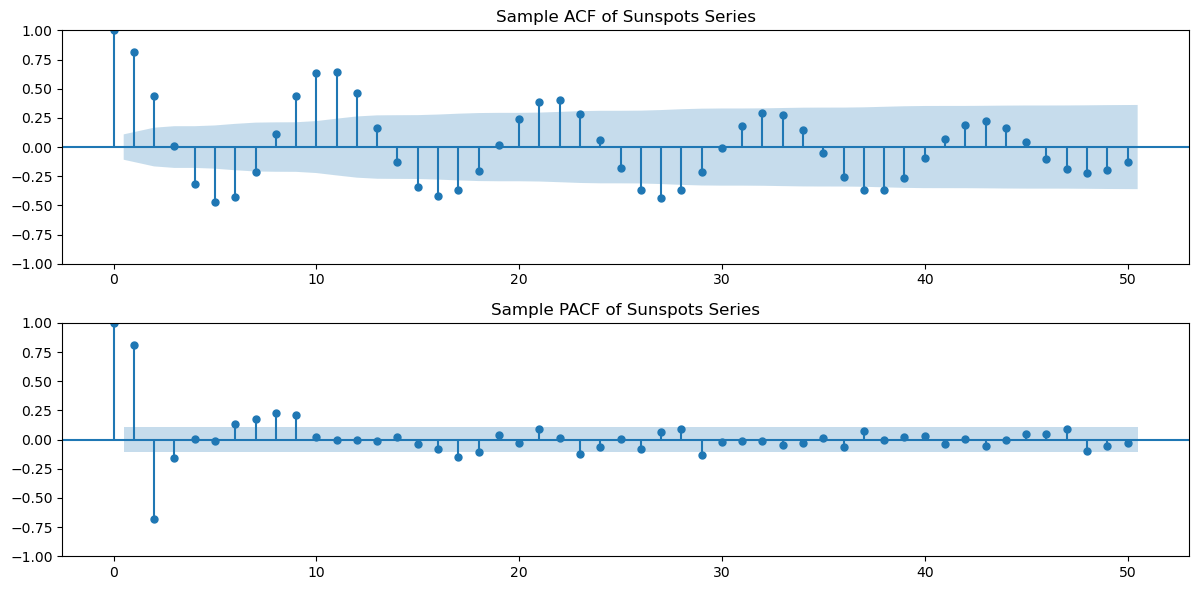

In [58]:
#a)
h_max = 50
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (12, 6))

plot_acf(y, lags = h_max, ax = axes[0])
axes[0].set_title("Sample ACF of Sunspots Series")

plot_pacf(y, lags = h_max, ax = axes[1])
axes[1].set_title("Sample PACF of Sunspots Series")

plt.tight_layout()
plt.show()

Since there are oscillatory pattern observed in the sample ACF, so MA(q) model might not be appropriate for this dataset. For sample PACF, there are large autocorrelations in lag 1, 2 and also obvious, non-trivial autocorrelation in lag 7. 8. 9. So we may try to fit AR(9) to this dataset.

In [59]:
#b)
# Fit the AR(9) model with training data
armd_9 = AutoReg(y_train, lags = 9).fit()
k = 50

In [60]:
k = 50
fcast_9 = armd_9.get_prediction(start = n_train, end = n_train + k - 1)
fcast_mean_9 = fcast_9.predicted_mean

In [61]:
test_interval = range(n_train + 1, n_train + k + 1)

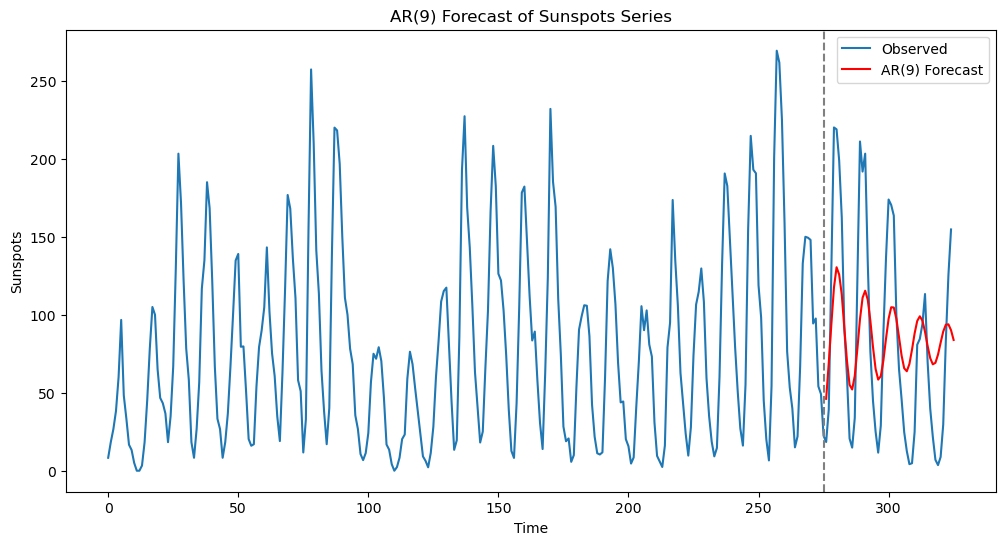

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(y, label = "Observed")
plt.plot(test_interval, fcast_mean_9, label = "AR(9) Forecast", color = 'red')
plt.axvline(x = n_train, color = 'gray', linestyle = '--')
plt.title("AR(9) Forecast of Sunspots Series")
plt.xlabel("Time")
plt.ylabel("Sunspots")
plt.legend()
plt.show()

In [63]:
from sklearn.metrics import mean_squared_error
mse_9 = mean_squared_error(y_test, fcast_mean_9)
print(f"Mean Squared Error for AR(9): {mse_9:.4f}")

Mean Squared Error for AR(9): 2868.3156


The mean square error for prediction is 2868.3156. The predicted curve capture the period of oscilation from the original test dataset well, but it fail to capture the amplitude of oscilation with gradual attenuation of its amplitude.

In [ ]:
pmax = 10
qmax = 10

aicmat_diff = np.full((pmax + 1, qmax + 1), np.nan)
bicmat_diff = np.full((pmax + 1, qmax + 1), np.nan)

for i in range(pmax + 1):
    for j in range(qmax + 1):
        try:
            model = ARIMA(y_train, order=(i, 0, j)).fit()
            aicmat_diff[i, j] = model.aic
            bicmat_diff[i, j] = model.bic
        except Exception as e:
            # Some models may not converge; skip them
            print(f"ARIMA({i},0,{j}) failed: {e}")
            continue

aic_df = pd.DataFrame(aicmat_diff, index=[f'AR({i})' for i in range(pmax+1)],
                               columns=[f'MA({j})' for j in range(qmax+1)])
bic_df = pd.DataFrame(bicmat_diff, index=[f'AR({i})' for i in range(pmax+1)],
                               columns=[f'MA({j})' for j in range(qmax+1)])

# Best AR model (MA = 0)
best_ar_aic = np.nanargmin(aicmat_diff[:, 0])
best_ar_bic = np.nanargmin(bicmat_diff[:, 0])

# Best MA model (AR = 0)
best_ma_aic = np.nanargmin(aicmat_diff[0, :])
best_ma_bic = np.nanargmin(bicmat_diff[0, :])

# Best ARMA model overall
best_arma_aic = np.unravel_index(np.nanargmin(aicmat_diff), aicmat_diff.shape)
best_arma_bic = np.unravel_index(np.nanargmin(bicmat_diff), bicmat_diff.shape)

# Print results
print(f"Best AR model by AIC: AR({best_ar_aic})")
print(f"Best AR model by BIC: AR({best_ar_bic})")

print(f"Best MA model by AIC: MA({best_ma_aic})")
print(f"Best MA model by BIC: MA({best_ma_bic})")

print(f"Best ARMA model by AIC: ARIMA{best_arma_aic}")
print(f"Best ARMA model by BIC: ARIMA{best_arma_bic}")


/opt/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:

ARIMA(7,0,5) failed: LU decomposition error.


/opt/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarni

Best AR model by AIC: AR(9)
Best AR model by BIC: AR(9)
Best MA model by AIC: MA(10)
Best MA model by BIC: MA(4)
Best ARMA model by AIC: ARIMA(5, 6)
Best ARMA model by BIC: ARIMA(3, 3)


/opt/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [72]:
#d)
BIC_best = ARIMA(y_train, order = (3, 0, 3)).fit()
AIC_best = ARIMA(y_train, order = (5, 0, 6)).fit()

/opt/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
aicmat_diff[12, 5]

105.64292094945418

In [73]:
BIC_best_cast = BIC_best.get_prediction(start = n_train, end = n_train + k - 1)
AIC_best_cast = AIC_best.get_prediction(start = n_train, end = n_train + k - 1)
fcast_mean_BIC = BIC_best_cast.predicted_mean
fcast_mean_AIC = AIC_best_cast.predicted_mean

fcast_mean_AIC


array([ 37.24900135,  44.00366749,  65.91463834,  96.92457636,
       120.31999538, 124.83556866, 111.86778528,  92.03741623,
        75.57604992,  65.82993542,  60.69494374,  58.46934354,
        60.97891573,  70.84774835,  86.53212602, 101.08965692,
       106.59251227, 100.2020448 ,  86.25013291,  72.60639917,
        64.91485423,  63.75770805,  66.44339222,  70.67089759,
        76.16230713,  83.15348811,  90.11817176,  93.70061476,
        91.23354259,  83.35015535,  74.01063697,  67.78781094,
        66.82932495,  70.03327711,  74.73760712,  78.98869273,
        82.32704909,  84.84733538,  86.03413982,  84.84133536,
        80.92393272,  75.59715789,  71.34473286,  70.1749914 ,
        72.26998649,  76.07227896,  79.59629495,  81.7181697 ,
        82.42713473,  82.14167343])

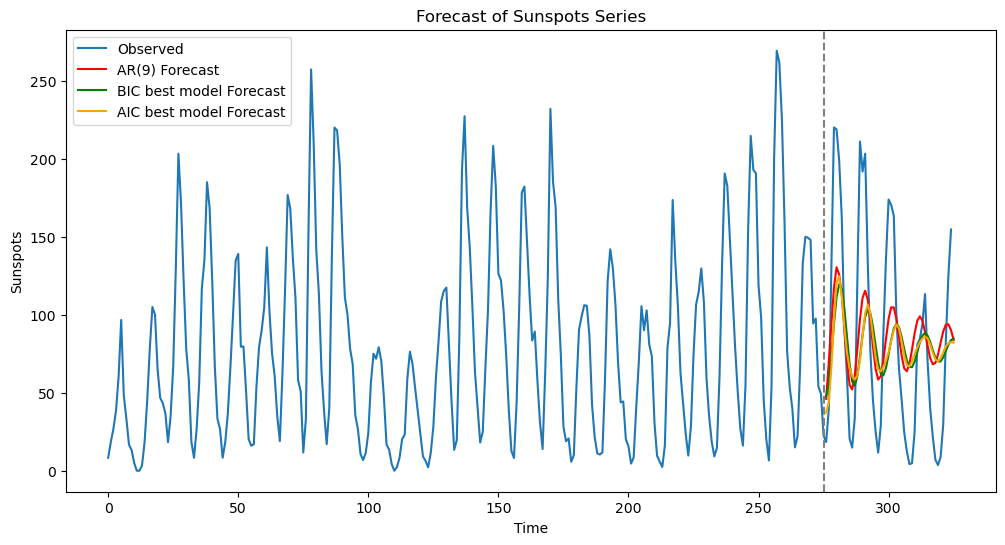

In [74]:
plt.figure(figsize=(12, 6))
plt.plot(y, label = "Observed")
plt.plot(test_interval, fcast_mean_9, label = "AR(9) Forecast", color = 'red')
plt.plot(test_interval, fcast_mean_BIC, label = "BIC best model Forecast", color = 'green')
plt.plot(test_interval, fcast_mean_AIC, label = "AIC best model Forecast", color = 'orange')
plt.axvline(x = n_train, color = 'gray', linestyle = '--')
plt.title("Forecast of Sunspots Series")
plt.xlabel("Time")
plt.ylabel("Sunspots")
plt.legend()
plt.show()

In [ ]:
mse_BIC = mean_squared_error(y_test, fcast_mean_BIC)
mse_AIC = mean_squared_error(y_test, fcast_mean_AIC)
print(f"Mean Squared Error for BIC model: {mse_BIC:.4f}")
print(f"Mean Squared Error for AIC model: {mse_AIC:.4f}")
print(f"Mean Squared Error for AR(9): {mse_9:.4f}")

Mean Squared Error for BIC model: 3034.9167
Mean Squared Error for AIC model: 3025.8715
Mean Squared Error for AR(9): 2868.3156


The AR(9) model achieves the best performance on account of mean square error. I initially used range 0-12 for both p and q for model BIC, AIC selection but ending at ARMA(12,5) model which gives explosive, non-sensical predictions (-20000). Following Professor Aditya's suggestion of using 0-10, the BIC, AIC selection generated relatively reasonable models, with reasonable prediction.

# Q7

In [51]:
bond = pd.read_csv('IRLTLT01USM156N.csv')

In [118]:
y = bond['IRLTLT01USM156N']
ydiff = np.diff(y)

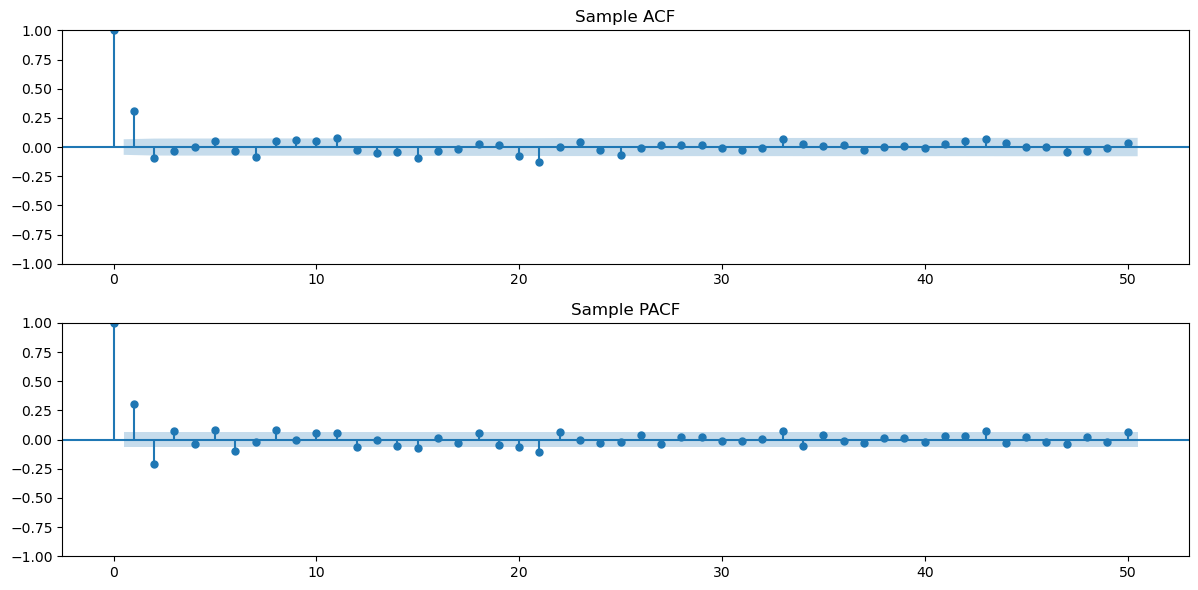

In [77]:
#a)
h_max = 50
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (12, 6))
plot_acf(ydiff, lags = h_max, ax = axes[0])
axes[0].set_title("Sample ACF")
plot_pacf(ydiff, lags = h_max, ax = axes[1])
axes[1].set_title("Sample PACF")
plt.tight_layout()
plt.show()

Reasonable MA model shall be MA(1): 
From the sample ACF graph we observe significant autocorrelation in lag 1, and afterwards the sample ACF starts to become negligible.

Reasonable AR model should be AR(2):
From the sample PACF graph we observe significant autocorrelation in lag 1 and lag2, and afterwards the sample PACF starts to become negligible.

In [125]:
#b)
ma_1 = ARIMA(ydiff, order = (0, 0, 1), trend = 't').fit()
ar_2 = ARIMA(ydiff, order = (2, 0, 0), trend = 't').fit()

/opt/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [126]:
ma_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  863
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 -12.323
Date:                Tue, 22 Apr 2025   AIC                             30.646
Time:                        16:35:46   BIC                             44.927
Sample:                             0   HQIC                            36.113
                                - 863                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -5.276e-06   2.49e-05     -0.212      0.832   -5.41e-05    4.35e-05
ma.L1          0.3861      0.020     19.013      0.000       0.346       0.426
sigma2         0.0607      0.002     39.210      0.000       0.058       0.064
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              1272.71
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.72   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [127]:
ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  863
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 -12.022
Date:                Tue, 22 Apr 2025   AIC                             32.043
Time:                        16:35:51   BIC                             51.085
Sample:                             0   HQIC                            39.332
                                - 863                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -5.099e-06   2.13e-05     -0.240      0.811   -4.68e-05    3.66e-05
ar.L1          0.3705      0.021     17.994      0.000       0.330       0.411
ar.L2         -0.2089      0.020    -10.377      0.000      -0.248      -0.169
sigma2         0.0603      0.001     40.655      0.000       0.057       0.063
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):              1258.20
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               1.72   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [128]:
# Obtain MA(q) approximation to the fitted AR(p) model
ar_params = ar_2.arparams
ma_params = ma_1.maparams
ma_approx = arma2ma(ar_params, ma_params)

In [131]:
ar_coefs = [1] + [-x for x in ar_params]
ma_coefs = [1]
ar2_process = ArmaProcess(ar_coefs, ma_coefs)

In [132]:
ma_approx = ar2_process.arma2ma(lags = 50)

In [133]:
ma_approx

array([ 1.00000000e+00,  3.70452782e-01, -7.16342031e-02, -1.03913365e-01,
       -2.35327973e-02,  1.29865389e-02,  9.72618226e-03,  8.90599829e-04,
       -1.70157732e-03, -8.16373162e-04,  5.29798378e-05,  1.90141955e-04,
        5.93727458e-05, -1.77200499e-05, -1.89655955e-05, -3.32468025e-06,
        2.72969678e-06,  1.70564795e-06,  6.17117199e-08, -3.33396500e-07,
       -1.36397355e-07,  1.91075696e-08,  3.55676951e-08,  9.18516372e-09,
       -4.02633605e-09, -3.41006764e-09, -4.22290380e-10,  5.55820363e-10,
        2.94108766e-10, -7.14049223e-12, -6.40755563e-11, -2.22455373e-11,
        5.14250610e-12,  6.55146920e-12,  1.35289748e-12, -8.67217241e-13,
       -6.03842015e-13, -4.25597517e-14,  1.10357781e-13,  4.97717797e-14,
       -4.61227666e-15, -1.21044358e-14, -3.52075815e-15,  1.22397240e-15,
        1.18880286e-15,  1.84744863e-16, -1.79865370e-16, -1.05219188e-16,
       -1.41035688e-18,  2.14546050e-17])

In [134]:
[ma_params, ma_approx[1]]

[array([0.38610321]), 0.3704527818470798]

The parameter estimate for MA(1) and the corresponding counterpart from the approximated MA model from AR(2) are close to each other numerically, but not identical.

In [135]:
#c)
n = len(y)
k = 100
fcast_diff_ar = ar_2.get_prediction(start=n-1, end=n+k-2).predicted_mean 
fcast_diff_ma = ma_1.get_prediction(start=n-1, end=n+k-2).predicted_mean
# these are the forecasts for the differenced data
last_observed_y = y.iloc[-1]

# Forecast for AR
fcast_ar = np.zeros(k)
fcast_ar[0] = last_observed_y + fcast_diff_ar[0]
for i in range(1, k):
    fcast_ar[i] = fcast_ar[i-1] + fcast_diff_ar[i]

# Forecast for MA
fcast_ma = np.zeros(k)
fcast_ma[0] = last_observed_y + fcast_diff_ma[0]
for i in range(1, k):
    fcast_ma[i] = fcast_ma[i-1] + fcast_diff_ma[i]

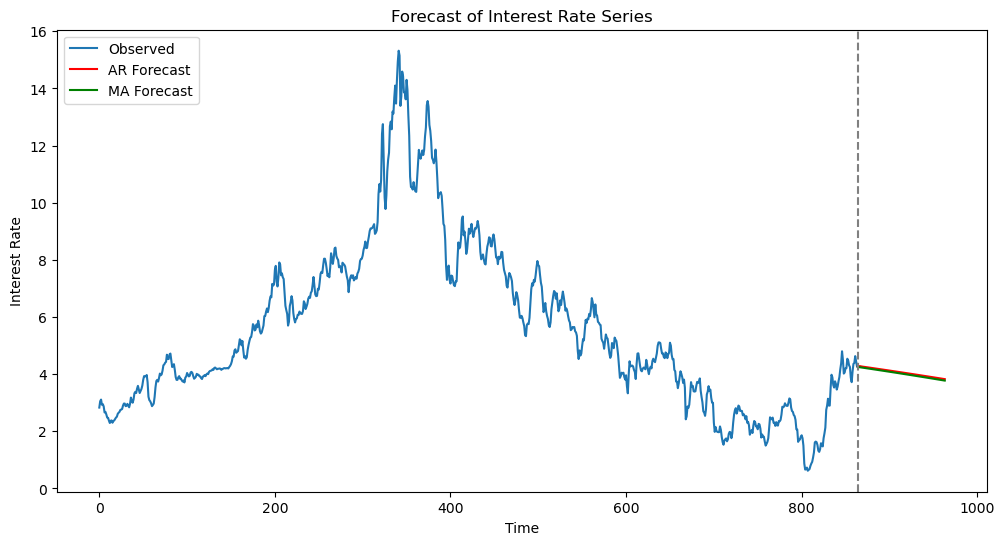

In [136]:
plt.figure(figsize = (12, 6))
plt.plot(y, label = 'Observed')
plt.plot(range(n, n + k), fcast_ar, label = 'AR Forecast', color = 'red')
plt.plot(range(n, n + k), fcast_ma, label = 'MA Forecast', color = 'green')
plt.axvline(x = n, color = 'gray', linestyle = '--')
plt.title("Forecast of Interest Rate Series")
plt.xlabel("Time")
plt.ylabel("Interest Rate")
plt.legend()
plt.show()

The two predictions are pretty similar with almost overlapping monotonous trend.

In [137]:
#d)
pmax = 10
qmax = 10

aicmat_diff = np.full((pmax + 1, qmax + 1), np.nan)
bicmat_diff = np.full((pmax + 1, qmax + 1), np.nan)

for i in range(pmax + 1):
    for j in range(qmax + 1):
        try:
            model = ARIMA(ydiff, order=(i, 0, j), trend = 't').fit()
            aicmat_diff[i, j] = model.aic
            bicmat_diff[i, j] = model.bic
        except Exception as e:
            # Some models may not converge; skip them
            print(f"ARIMA({i},0,{j}) failed: {e}")
            continue

aic_df = pd.DataFrame(aicmat_diff, index=[f'AR({i})' for i in range(pmax+1)],
                               columns=[f'MA({j})' for j in range(qmax+1)])
bic_df = pd.DataFrame(bicmat_diff, index=[f'AR({i})' for i in range(pmax+1)],
                               columns=[f'MA({j})' for j in range(qmax+1)])

# Best AR model (MA = 0)
best_ar_aic = np.nanargmin(aicmat_diff[:, 0])
best_ar_bic = np.nanargmin(bicmat_diff[:, 0])

# Best MA model (AR = 0)
best_ma_aic = np.nanargmin(aicmat_diff[0, :])
best_ma_bic = np.nanargmin(bicmat_diff[0, :])

# Best ARMA model overall
best_arma_aic = np.unravel_index(np.nanargmin(aicmat_diff), aicmat_diff.shape)
best_arma_bic = np.unravel_index(np.nanargmin(bicmat_diff), bicmat_diff.shape)

# Print results
print(f"Best AR model by AIC: AR({best_ar_aic})")
print(f"Best AR model by BIC: AR({best_ar_bic})")

print(f"Best MA model by AIC: MA({best_ma_aic})")
print(f"Best MA model by BIC: MA({best_ma_bic})")

print(f"Best ARMA model by AIC: ARIMA{best_arma_aic}")
print(f"Best ARMA model by BIC: ARIMA{best_arma_bic}")


/opt/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarni

Best AR model by AIC: AR(8)
Best AR model by BIC: AR(2)
Best MA model by AIC: MA(9)
Best MA model by BIC: MA(2)
Best ARMA model by AIC: ARIMA(6, 4)
Best ARMA model by BIC: ARIMA(0, 2)


In [138]:
#e)
fcast_diff_ar_aic = ARIMA(ydiff, order = (8, 0, 0), trend = 't').fit()
fcast_diff_ar_bic = ARIMA(ydiff, order = (2, 0, 0), trend = 't').fit()
fcast_diff_ma_aic = ARIMA(ydiff, order = (0, 0, 9), trend = 't').fit()
fcast_diff_ma_bic = ARIMA(ydiff, order = (0, 0, 2), trend = 't').fit()
fcast_diff_arma_aic = ARIMA(ydiff, order = (6, 0, 4), trend = 't').fit()
fcast_diff_arma_bic = ARIMA(ydiff, order = (0, 0, 2), trend = 't').fit()

fcast_diff_ar_aic_cast = fcast_diff_ar_aic.get_prediction(start=n-1, end=n+k-2)
fcast_diff_ar_bic_cast = fcast_diff_ar_bic.get_prediction(start=n-1, end=n+k-2)
fcast_diff_ma_aic_cast = fcast_diff_ma_aic.get_prediction(start=n-1, end=n+k-2)
fcast_diff_ma_bic_cast = fcast_diff_ma_bic.get_prediction(start=n-1, end=n+k-2)
fcast_diff_arma_aic_cast = fcast_diff_arma_aic.get_prediction(start=n-1, end=n+k-2)
fcast_diff_arma_bic_cast = fcast_diff_arma_bic.get_prediction(start=n-1, end=n+k-2)
fcast_diff_ar_aic_mean = fcast_diff_ar_aic_cast.predicted_mean
fcast_diff_ar_bic_mean = fcast_diff_ar_bic_cast.predicted_mean
fcast_diff_ma_aic_mean = fcast_diff_ma_aic_cast.predicted_mean
fcast_diff_ma_bic_mean = fcast_diff_ma_bic_cast.predicted_mean
fcast_diff_arma_aic_mean = fcast_diff_arma_aic_cast.predicted_mean
fcast_diff_arma_bic_mean = fcast_diff_arma_bic_cast.predicted_mean
# these are the forecasts for the differenced data
last_observed_y = y.iloc[-1]
# Forecast for AR
fcast_ar_aic = np.zeros(k)
fcast_ar_aic[0] = last_observed_y + fcast_diff_ar_aic_mean[0]
for i in range(1, k):
    fcast_ar_aic[i] = fcast_ar_aic[i-1] + fcast_diff_ar_aic_mean[i]
# Forecast for MA
fcast_ar_bic = np.zeros(k)
fcast_ar_bic[0] = last_observed_y + fcast_diff_ar_bic_mean[0]
for i in range(1, k):
    fcast_ar_bic[i] = fcast_ar_bic[i-1] + fcast_diff_ar_bic_mean[i]
# Forecast for MA
fcast_ma_aic = np.zeros(k)
fcast_ma_aic[0] = last_observed_y + fcast_diff_ma_aic_mean[0] 
for i in range(1, k):
    fcast_ma_aic[i] = fcast_ma_aic[i-1] + fcast_diff_ma_aic_mean[i]
# Forecast for MA
fcast_ma_bic = np.zeros(k)
fcast_ma_bic[0] = last_observed_y + fcast_diff_ma_bic_mean[0]
for i in range(1, k):
    fcast_ma_bic[i] = fcast_ma_bic[i-1] + fcast_diff_ma_bic_mean[i]
# Forecast for ARMA
fcast_arma_aic = np.zeros(k)
fcast_arma_aic[0] = last_observed_y + fcast_diff_arma_aic_mean[0]
for i in range(1, k):
    fcast_arma_aic[i] = fcast_arma_aic[i-1] + fcast_diff_arma_aic_mean[i]
# Forecast for ARMA
fcast_arma_bic = np.zeros(k)
fcast_arma_bic[0] = last_observed_y + fcast_diff_arma_bic_mean[0]
for i in range(1, k):
    fcast_arma_bic[i] = fcast_arma_bic[i-1] + fcast_diff_arma_bic_mean[i]




/opt/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarni

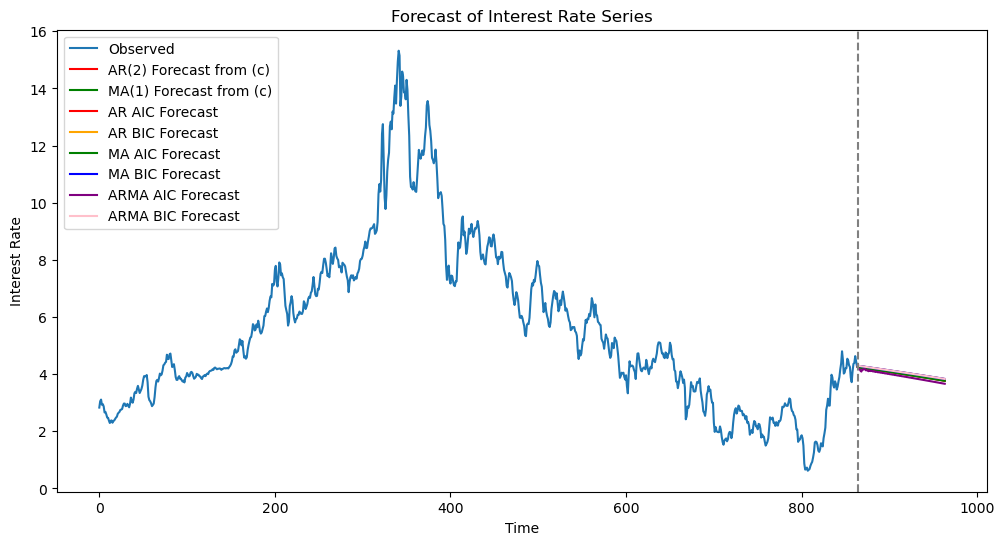

In [139]:
plt.figure(figsize = (12, 6))
plt.plot(y, label = 'Observed')
plt.plot(range(n, n + k), fcast_ar, label = 'AR(2) Forecast from (c)', color = 'red')
plt.plot(range(n, n + k), fcast_ma, label = 'MA(1) Forecast from (c)', color = 'green')
plt.plot(range(n, n + k), fcast_ar_aic, label = 'AR AIC Forecast', color = 'red')   
plt.plot(range(n, n + k), fcast_ar_bic, label = 'AR BIC Forecast', color = 'orange')
plt.plot(range(n, n + k), fcast_ma_aic, label = 'MA AIC Forecast', color = 'green')
plt.plot(range(n, n + k), fcast_ma_bic, label = 'MA BIC Forecast', color = 'blue')
plt.plot(range(n, n + k), fcast_arma_aic, label = 'ARMA AIC Forecast', color = 'purple')
plt.plot(range(n, n + k), fcast_arma_bic, label = 'ARMA BIC Forecast', color = 'pink')
plt.axvline(x = n, color = 'gray', linestyle = '--')
plt.title("Forecast of Interest Rate Series")
plt.xlabel("Time")
plt.ylabel("Interest Rate")
plt.legend()
plt.show()

All models share similar monotonous gentle decrease trends with overlapping predictions. 

# Q8

In [153]:
golf = pd.read_csv('golf.csv')

In [154]:
golf.drop(golf.index[0], inplace = True)
y = golf.iloc[:, 0].values.astype(float)

In [156]:
y_test = y[-36:]
y_train = y[:-36]

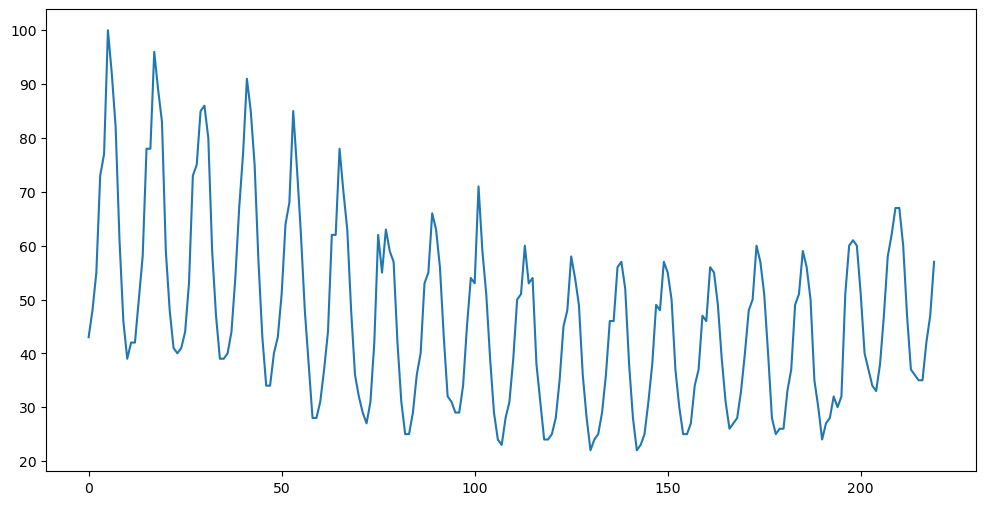

In [179]:
plt.figure(figsize = (12, 6))
plt.plot(y_train)

There is clear annual trend in the original dataset, so we may first consider take difference based on period of 12.

In [181]:
y = pd.Series(y)
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

In [182]:
y_train_12 = y_train.diff(periods = 12)

Text(0.5, 1.0, 'Seasonal difference at lag 12')

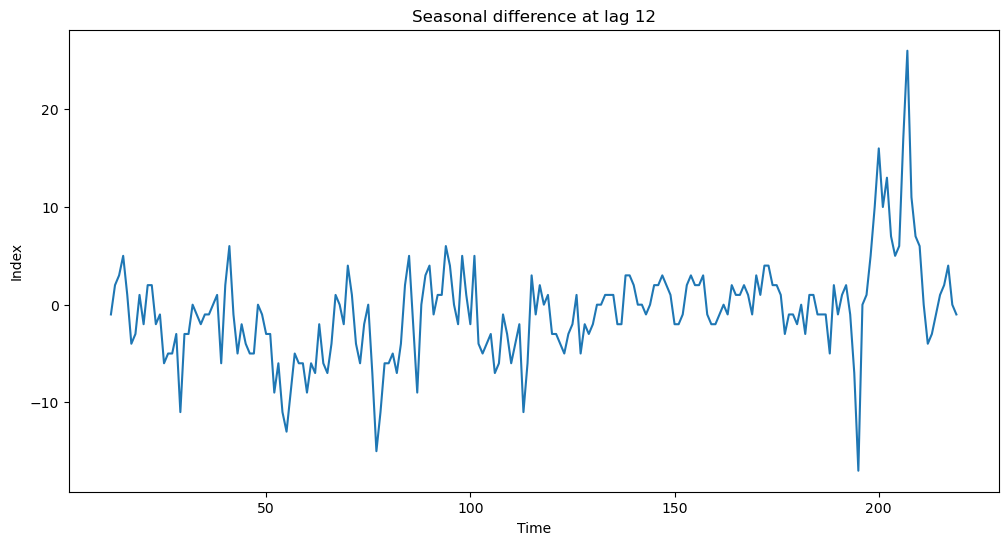

In [183]:
plt.figure(figsize = (12, 6))
plt.plot(y_train_12)
plt.xlabel('Time')
plt.ylabel('Index')
plt.title('Seasonal difference at lag 12')

It seems that the data still have trends in the dataset, so we may take one more difference on the y_train data:

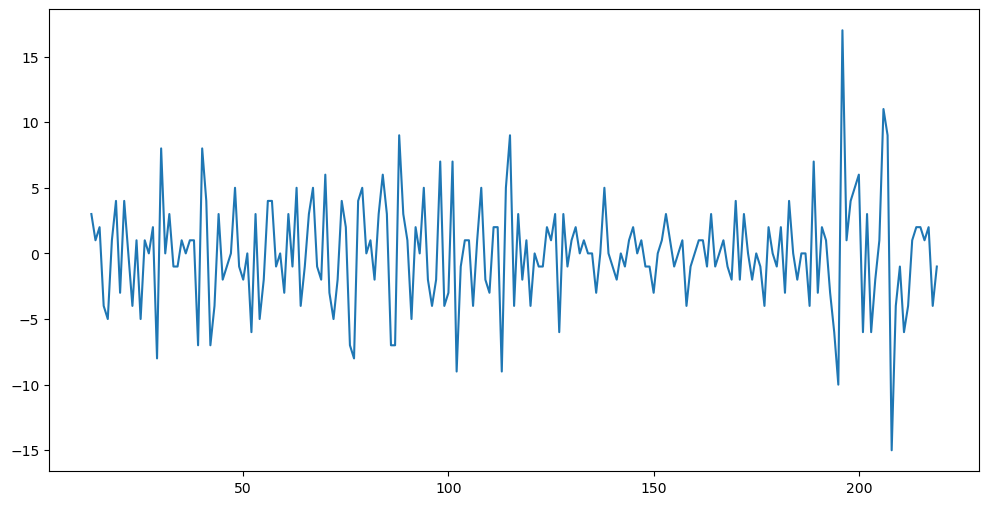

In [184]:
y_train_13 = y_train_12.diff()
plt.figure(figsize = (12, 6))
plt.plot(y_train_13)
plt.show()

Then we plot the ACF and PACF of the differenced data.

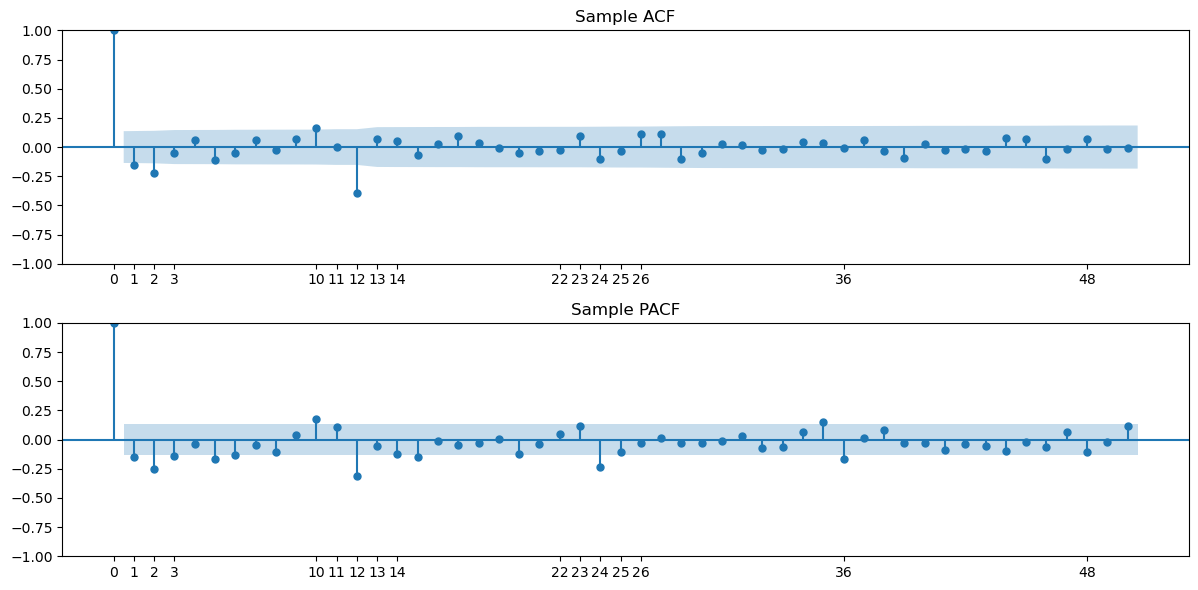

In [185]:
h_max = 50
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (12, 6))
plot_acf(y_train_13.dropna(), lags = h_max, ax = axes[0])
axes[0].set_title("Sample ACF")
axes[0].set_xticks([0, 1, 2, 3, 10, 11, 12, 13, 14, 22, 23, 24, 25, 26, 36, 48]) 
plot_pacf(y_train_13.dropna(), lags = h_max, ax = axes[1])
axes[1].set_title("Sample PACF")
axes[1].set_xticks([0, 1, 2, 3, 10, 11, 12, 13, 14, 22, 23, 24, 25, 26, 36, 48]) 
plt.tight_layout()
plt.show()

Then we can use the brutal approach by comparing the AIC, BIC score of some selected parameters range, for the determination of our final model.

We shall perform this selection directly on our training dataset.

In [186]:
dt = y_train
pmax, dmax, qmax = 2, 1, 2
Pmax, D, Qmax = 2, 1, 2
seasonal_period = 12

results = []

for p in range(pmax + 1):
    for d in range(dmax + 1):
        for q in range(qmax + 1):
            for P in range(Pmax + 1):
                for Q in range(Qmax + 1):
                    try:
                        model = ARIMA(dt, 
                                      order=(p, d, q), 
                                      seasonal_order=(P, D, Q, seasonal_period)).fit()
                        results.append({
                            'p': p, 'd': d, 'q': q,
                            'P': P, 'D': D, 'Q': Q,
                            'AIC': model.aic,
                            'BIC': model.bic
                        })
                    except Exception as e:
                        print(f"ARIMA({p},{d},{q})x({P},{D},{Q}) failed: {e}")
                        continue

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Find best models
best_aic_idx = results_df['AIC'].idxmin()
best_bic_idx = results_df['BIC'].idxmin()

best_aic_model = results_df.loc[best_aic_idx]
best_bic_model = results_df.loc[best_bic_idx]

# Display results
print("Best model by AIC:")
print(best_aic_model)

print("\nBest model by BIC:")
print(best_bic_model)

/opt/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarni

Best model by AIC:
p         1.000000
d         1.000000
q         1.000000
P         2.000000
D         1.000000
Q         2.000000
AIC    1063.359658
BIC    1086.688690
Name: 98, dtype: float64

Best model by BIC:
p         1.000000
d         1.000000
q         1.000000
P         0.000000
D         1.000000
Q         1.000000
AIC    1071.001675
BIC    1084.332551
Name: 91, dtype: float64


In [187]:
#model selected by AIC
m1 = ARIMA(y_train, order = (1, 1, 1), seasonal_order = (2, 1, 2, 12)).fit()
print(m1.summary())

                                       SARIMAX Results                                       
Dep. Variable:                                     y   No. Observations:                  220
Model:             ARIMA(1, 1, 1)x(2, 1, [1, 2], 12)   Log Likelihood                -524.680
Date:                               Sat, 26 Apr 2025   AIC                           1063.360
Time:                                       22:52:01   BIC                           1086.689
Sample:                                            0   HQIC                          1072.794
                                               - 220                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5774      0.078      7.401      0.000       0.424       0.730
ma.L1      

In [188]:
#model selected by BIC
m2 = ARIMA(y, order = (1, 1, 1), seasonal_order = (0, 1, 1, 12)).fit()
print(m2.summary())

                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                  256
Model:             ARIMA(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -627.939
Date:                          Sat, 26 Apr 2025   AIC                           1263.877
Time:                                  22:52:02   BIC                           1277.849
Sample:                                       0   HQIC                          1269.505
                                          - 256                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5420      0.062      8.749      0.000       0.421       0.663
ma.L1         -0.9047      0.047    -19.439      0.

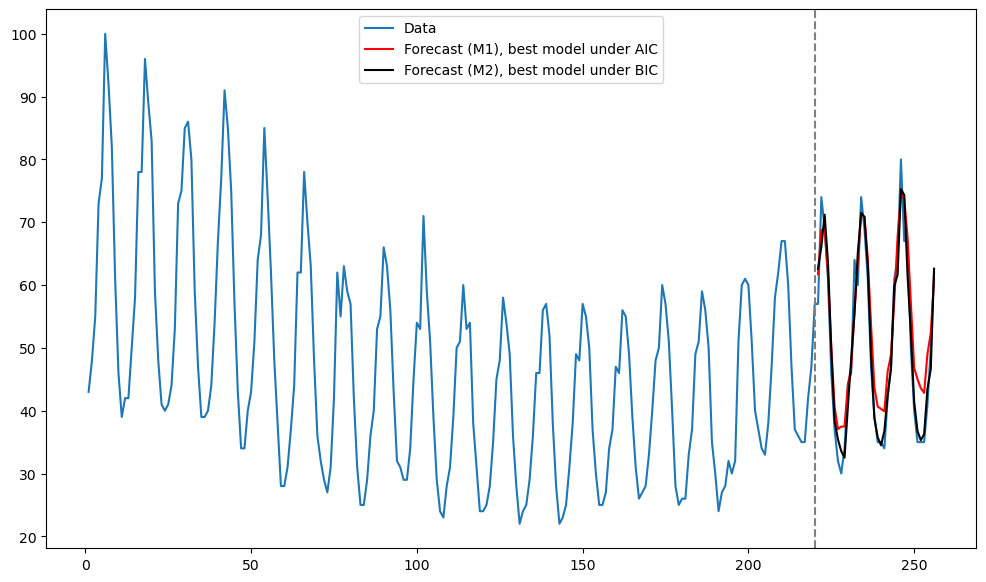

In [190]:
k = 36
n = len(y_train)
tme = range(1, n+1)
tme_future = range(n+1, n+k+1)
fcast1 = m1.get_prediction(start = n, end = n+k-1).predicted_mean
fcast2 = m2.get_prediction(start = n, end = n+k-1).predicted_mean
plt.figure(figsize = (12, 7))
plt.plot(range(1, n+k+1), y, label = 'Data')
plt.plot(tme_future, fcast1, label = 'Forecast (M1), best model under AIC', color = 'red')
plt.plot(tme_future, fcast2, label = 'Forecast (M2), best model under BIC', color = 'black')
plt.axvline(x=n, color='gray', linestyle='--')
plt.legend()
plt.show()

In [191]:
mse_m1 = mean_squared_error(y_test, fcast1)
mse_m2 = mean_squared_error(y_test, fcast2)

In [192]:
print("the mean square error of AIC selected model is: ", mse_m1)
print("the mean square error of BIC selected model is: ", mse_m2)

the mean square error of AIC selected model is:  26.88834073486988
the mean square error of BIC selected model is:  11.936068606573254


The model selected by AIC is $ARIMA(1, 1, 1) \times ARIMA(2, 1, 2)_{12}$ and the model selected by BIC is $ARIMA(1, 1, 1) \times ARIMA(0, 1, 1)_{12}$.
Both models could accurately capture the period of oscillation in the original data. The model selected by BIC performs better than AIC in terms of mean square error (mse of the AIC selected model is 26.8883 and for BIC selected model is 11.9361), and also intuitively the BIC selected model is better concerning fitting the amplitude of orginal dataset in graph.

# Q9

In [193]:
aquarium = pd.read_csv('aquarium.csv')
aquarium.drop(aquarium.index[0], inplace = True)

In [197]:
y = aquarium.iloc[:, 0].values.astype(float)

In [198]:
y_test = y[-36:]
y_train = y[:-36]

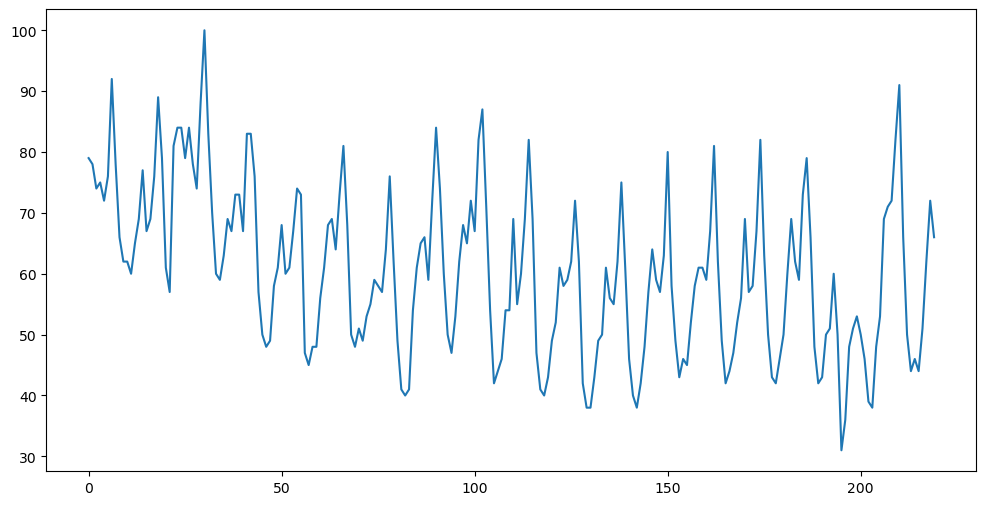

In [201]:
plt.figure(figsize = (12, 6))
plt.plot(y_train)

In [202]:
y = pd.Series(y)
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

a clear seasonal period of time lag 12 can be observed from drawing the ACF, PACF of the original data:

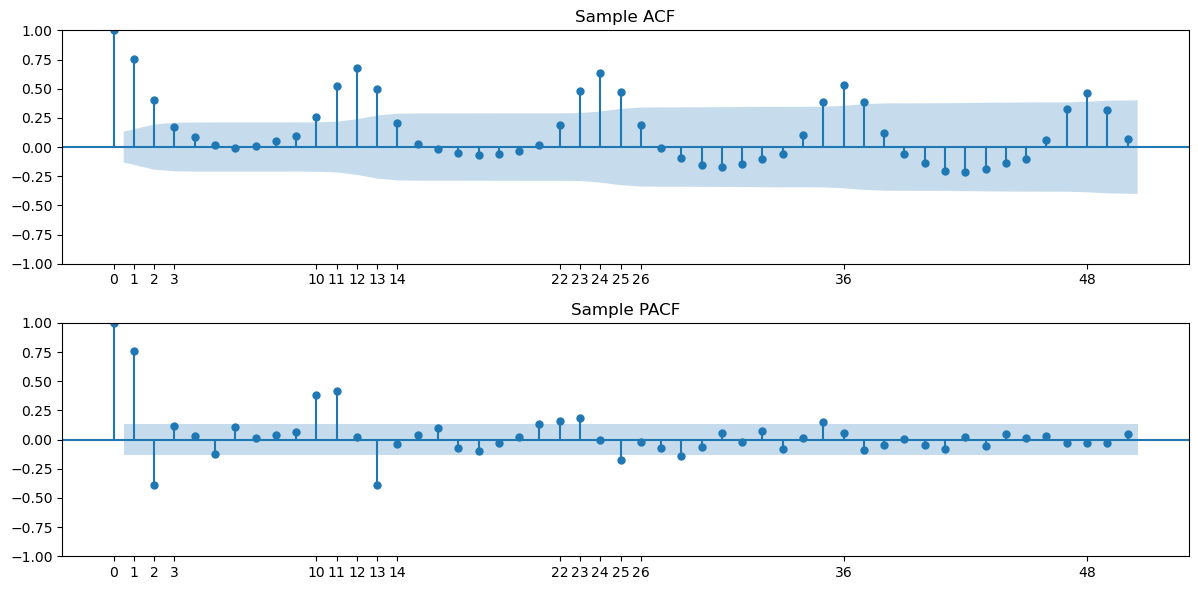

In [203]:
h_max = 50
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (12, 6))
plot_acf(y_train, lags = h_max, ax = axes[0])
axes[0].set_title("Sample ACF")
axes[0].set_xticks([0, 1, 2, 3, 10, 11, 12, 13, 14, 22, 23, 24, 25, 26, 36, 48]) 
plot_pacf(y_train, lags = h_max, ax = axes[1])
axes[1].set_title("Sample PACF")
axes[1].set_xticks([0, 1, 2, 3, 10, 11, 12, 13, 14, 22, 23, 24, 25, 26, 36, 48]) 
plt.tight_layout()
plt.show()

Hence, we first take difference of time lag 12, and plot it out:

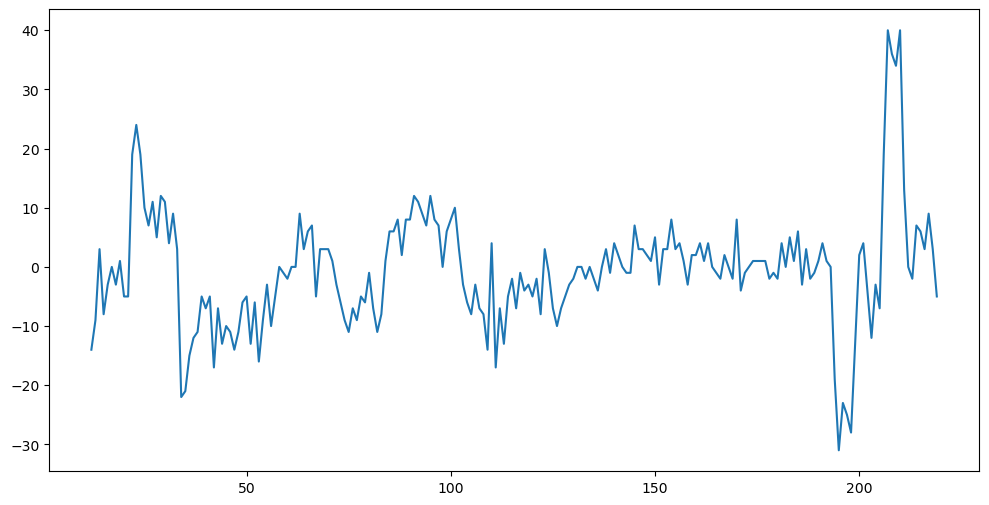

In [204]:
y_train_12 = y_train.diff(periods = 12)
plt.figure(figsize = (12, 6))
plt.plot(y_train_12)

There still exists clear non-stationary pattern, so we take difference for one more time:

In [205]:
y_train_13 = y_train_12.diff()

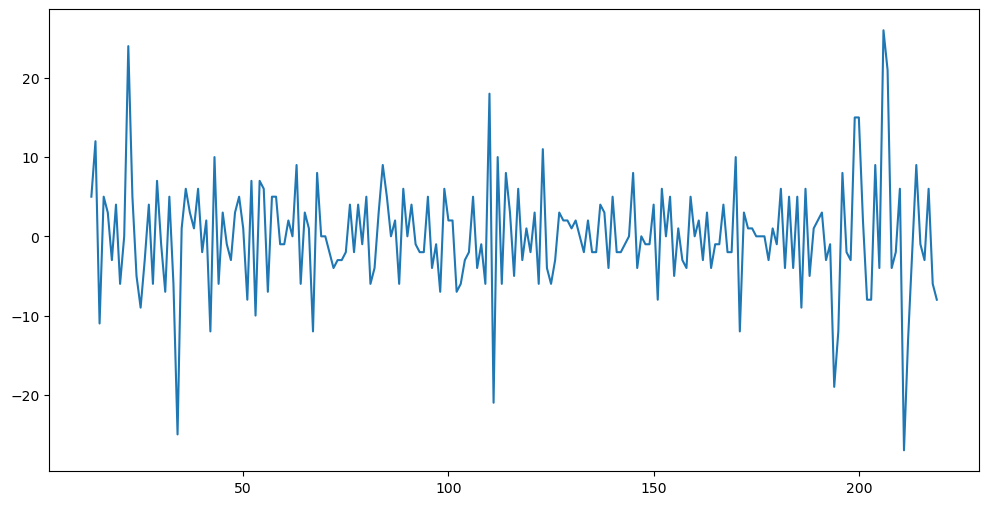

In [206]:
plt.figure(figsize = (12, 6))
plt.plot(y_train_13)

Then we plot the ACF, PACF of the data after taking another difference based on the 12 time lag difference data:

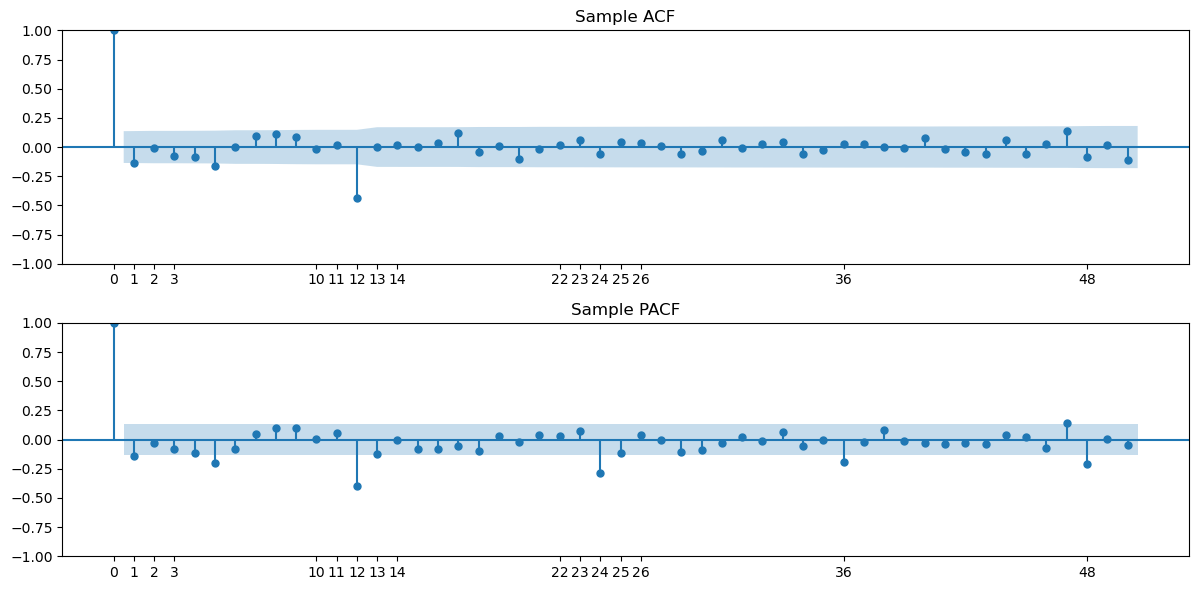

In [207]:
h_max = 50
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (12, 6))
plot_acf(y_train_13.dropna(), lags = h_max, ax = axes[0])
axes[0].set_title("Sample ACF")
axes[0].set_xticks([0, 1, 2, 3, 10, 11, 12, 13, 14, 22, 23, 24, 25, 26, 36, 48]) 
plot_pacf(y_train_13.dropna(), lags = h_max, ax = axes[1])
axes[1].set_title("Sample PACF")
axes[1].set_xticks([0, 1, 2, 3, 10, 11, 12, 13, 14, 22, 23, 24, 25, 26, 36, 48]) 
plt.tight_layout()
plt.show()

Then we can use the brutal approach by comparing the AIC, BIC score of some selected parameters range, for the determination of our final model.

We shall perform this selection directly on our training dataset.

In [208]:
dt = y_train
pmax, dmax, qmax = 2, 1, 2
Pmax, D, Qmax = 2, 1, 2
seasonal_period = 12

results = []

for p in range(pmax + 1):
    for d in range(dmax + 1):
        for q in range(qmax + 1):
            for P in range(Pmax + 1):
                for Q in range(Qmax + 1):
                    try:
                        model = ARIMA(dt, 
                                      order=(p, d, q), 
                                      seasonal_order=(P, D, Q, seasonal_period)).fit()
                        results.append({
                            'p': p, 'd': d, 'q': q,
                            'P': P, 'D': D, 'Q': Q,
                            'AIC': model.aic,
                            'BIC': model.bic
                        })
                    except Exception as e:
                        print(f"ARIMA({p},{d},{q})x({P},{D},{Q}) failed: {e}")
                        continue

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Find best models
best_aic_idx = results_df['AIC'].idxmin()
best_bic_idx = results_df['BIC'].idxmin()

best_aic_model = results_df.loc[best_aic_idx]
best_bic_model = results_df.loc[best_bic_idx]

# Display results
print("Best model by AIC:")
print(best_aic_model)

print("\nBest model by BIC:")
print(best_bic_model)

/opt/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/miniconda3/lib/python3.12/

Best model by AIC:
p         1.000000
d         1.000000
q         1.000000
P         0.000000
D         1.000000
Q         1.000000
AIC    1266.306832
BIC    1279.637707
Name: 91, dtype: float64

Best model by BIC:
p         1.000000
d         1.000000
q         1.000000
P         0.000000
D         1.000000
Q         1.000000
AIC    1266.306832
BIC    1279.637707
Name: 91, dtype: float64


In [220]:
#The best model selected by AIC and BIC are the same: ARIMA(1, 1, 1)(2, 1, 2, 12)
m1 = ARIMA(y_train, order = (1, 1, 1), seasonal_order = (0, 1, 1, 12)).fit()
print(m1.summary())

                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                  220
Model:             ARIMA(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -629.153
Date:                          Sun, 27 Apr 2025   AIC                           1266.307
Time:                                  10:27:43   BIC                           1279.638
Sample:                                       0   HQIC                          1271.698
                                          - 220                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7252      0.066     10.931      0.000       0.595       0.855
ma.L1         -0.9468      0.047    -20.266      0.

In [221]:
mse_m1 = mean_squared_error(y_test, m1.forecast(steps=36))
print("the mean square error of AIC and BIC selected model is: ", mse_m1)

the mean square error of AIC and BIC selected model is:  6.652018443825044


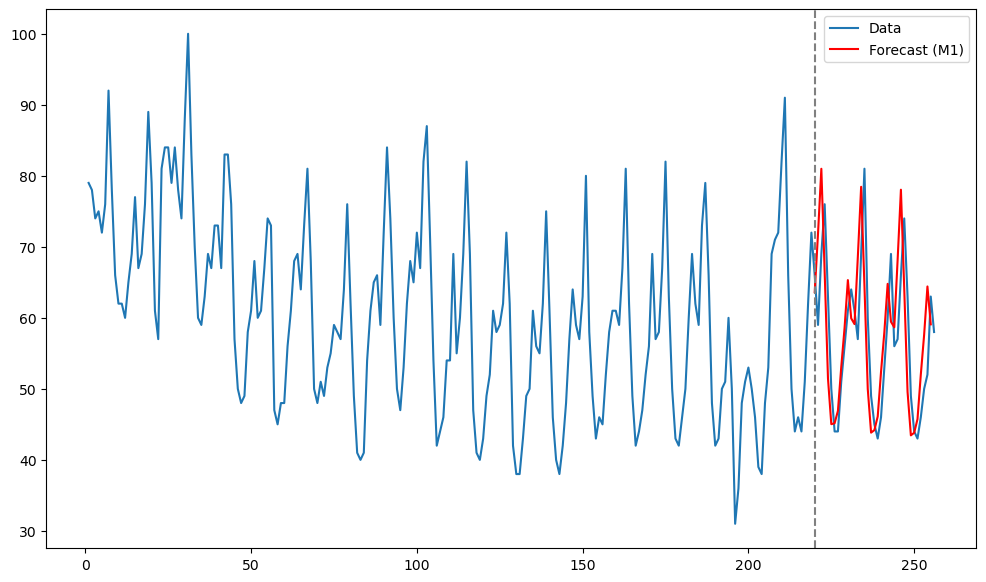

In [222]:
plt.figure(figsize = (12, 7))
plt.plot(range(1, len(y) + 1), y, label = 'Data')
plt.plot(range(len(y_train), len(y_train) + 36), m1.forecast(steps=36), label = 'Forecast (M1)', color = 'red')
plt.axvline(x=len(y_train), color='gray', linestyle='--')
plt.legend()
plt.show()

The best model selcted by AIC and BIC is the same: $ARIMA(1, 1, 1) \times ARIMA(0, 1, 1)_{12}$. The mean square error of the selected model is 6.652.

Intuitively from the plotted graph, the prediction also capture the oscillatory period and the amplitudes well from the original data.